In [1]:
import numpy as np
import pandas as pd
wave = 'waveform.data'
# data prends la data et la sépare a chaque fois présence d'un espace
af = np.loadtxt(wave, delimiter=',', skiprows=0, dtype=str, usecols=range(21))
X = pd.DataFrame(af)
ay = np.loadtxt(wave, delimiter=',', skiprows=0, dtype=str, usecols=[21])
y = pd.DataFrame(ay)
for i in range(21):
    X[i] = X[i].astype(float)
Xtrain = X[0:4000]
Xtest =X[4000:5000]
ytrain =ay[0:4000]
ytest =ay[4000:5000]

af=data(numpy)

ay= vector result (numpy)

X = data (pandas)

y= vector result (pandas)

(5000, 2)


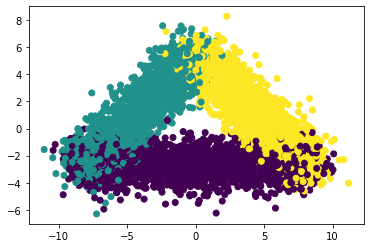

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#on tranforme en PCA la data pour avoir que deux params
pca=PCA(n_components=2)
x_pca=pca.fit_transform(X)#entraine model pca avec données, transforme ensuite x en x_pca
print(np.shape(x_pca))
plt.figure()
plt.scatter(x_pca[:,0],x_pca[:,1],c=y)#les deux colonnes car pca les as réduits en deux colonnes
plt.show()

here is a representation of the data, we have 3 colors

now we define a function that computes the euclidean distance between 2 vectors

In [3]:
def euclidienne(l1, l2):
    # représentera la distance
    dist = 0.0
    """on va boucle pour qu'il aille dans toutes les colonnes"""
    for i in range(21):
        # def de la dist euclidienne
        dist = dist + pow((l1[i] - l2[i]), 2)

    # on fait la racine carré de la distance
    dist = pow(dist, 0.5)
    return dist

In [4]:
def voisin_proche(X, vecteur, k):
    # stockera les 5000 distances
    dist = []
    j = 0
    for X_row in X.transpose():
        # on va comparer avec tout les autres vecteurs
        dist_temp = euclidienne(vecteur,X.iloc[X_row])
        # liste qui contiens: num voisin et distance 
        dist.append((j, X_row, dist_temp))
        j += 1
    # on trie les distances par ordre croissant
    dist.sort(key=lambda tri: tri[2])
    #print(dist)
    voisin = []
    # on va prendre les k plus proches voisins
    for i in range(k):
        # on va rajouter dans notre vecteur voisin le numero du voisin le i plus proche
        voisin.append(dist[i][0])
        #print(voisin)
    return voisin

function that returns a list of nearest neighbors relative to a vector, k= number of neighbors, X=data, vecteur=vector

In [5]:
#will print the 10 nearest neighbors
voisin=voisin_proche(X,X.loc[1],10)
print(voisin)

[1, 1639, 2193, 3621, 2107, 1478, 4381, 2999, 4853, 330]


In [6]:
#will return a number, it's the prediction
def predict(X, vecteur, k):
    voisin = voisin_proche(X, vecteur, k)
    output_values = [ytrain[row] for row in voisin]
    #print(output_values)
    #prendra le nombre qui apparait le plus de fois
    prediction = max(set(tuple(output_values)), key=output_values.count)
    #print(prediction)
    return prediction


resul=predict(Xtrain,Xtest.iloc[1],1)
print("prediction")
print(resul)
print("true result : ")
print(ytest[1])

prediction
1
true result : 
1


Now we can make our bruteforce version 

In [7]:
def bruteforce (Xtrain,Xtest,k):
    resul=[]
    bonresul=0
    for i in range(0,100):
        resul.append(predict(Xtrain,Xtest.iloc[i],k))
    #print(resul)
    for i in range (0,100):
        if ytest[i]==resul[i] :
            bonresul=bonresul + 1
    print("the accuracy for k =1 is : ")
    print(bonresul)
bruteforce(Xtrain,Xtest,1)

the accuracy for k =1 is : 
76


Now we will do an example of knn Ball tree from scratch, it's same idea than bruteforce, we will have 3 function : euclidian distance,Knn ball trees algorithm for detect KNN, and the function predict

In [8]:
def voisin_proche_cercle(X,vecteur,k,indexlist):
    # 'indexlist' est une liste de 4000 entiers (un pour chaque donnée)
    # Lors de l'appel de cette fonction, tous ces entiers sont initialisés à -1
    # A la fin de cette fonction récursive, les k plus proches voisins auront pour valeur d'entier 1, et les autres -1
    # Pendant la récursivité, les données qui seront exclues via la méthode des cercles auront temporairement un entier de valeur 0
    
    # version avec la méthode des cercles :
    global matricedistance
    global voisin
    dist = []
    index_voisin = -1
    dist_voisin = -1
    d = -1
    for X_row in X.transpose():
        if (indexlist[X_row] == 0):
            indexlist[X_row] = -1
        else :
            if (indexlist[X_row] == -1) :
                dist_temp = euclidienne(vecteur, X.iloc[X_row])
                if ( (dist_voisin == -1) or (dist_temp <= dist_voisin)) :
                    index_voisin = X_row
                    dist_voisin = dist_temp
                    j = 0
                else :
                    if (X_row != 3999) :
                        # on applique la méthode
                        r = dist_temp - dist_voisin
                        R = dist_temp + dist_voisin
                        # Pour chaque donnée restante
                        for i in range(X_row+1, len(matricedistance)) :
                            if (matricedistance[i][X_row] == -1) :
                                d = euclidienne(X.iloc[i],X.iloc[X_row])
                                matricedistance[i][X_row] = d
                                matricedistance[X_row][i] = d
                            else :
                                d = matricedistance[i][X_row]
                            # Si la donnée n'est pas comprise entre les deux cercles
                            if ( (d>R) or (d<r) ):
                                # La valeur ne sera pas le plus proche voisin
                                indexlist[i] = 0
    # A la fin on a notre plus proche voisin
    indexlist[index_voisin] = 1
    if (k != 0):
        voisin_proche_cercle(X,vecteur,k-1,indexlist)

In [9]:

def predict2(X, vecteur, k):
    indexlist = [-1] * 4000
    voisin_proche_cercle(X, vecteur, k, indexlist)
    voisin = []
    for i in range(4000) :
        if (indexlist[i] == 1):
            voisin.append(i)
    # fin de la méthode
    
    #print(voisin)
    output_values = [ytrain[row] for row in voisin]
    #print(output_values)
    #prendra le nombre qui apparait le plus de fois
    prediction = max(set(tuple(output_values)), key=output_values.count)
    #print(prediction)
    return prediction


In [10]:
def cercle (Xtrain,Xtest,k):
    resul=[]
    bonresul=0
    for i in range(0,100):
        resul.append(predict2(Xtrain,Xtest.iloc[i],k))
    #print(resul)
    for i in range (0,100):
        if ytest[i]==resul[i] :
            bonresul=bonresul + 1
    print("the accuracy for k =1 is : ")
    print(bonresul)
#création et remplissage de la matrice des distances
matricedistance = []
for i in range(4000):
    matricedistance.append([])
    for j in range(4000):
        matricedistance[i].append(-1)
cercle(Xtrain,Xtest,1)

the accuracy for k =1 is : 
78


-------------------------------
best k = 
136
accuracy :
0.858


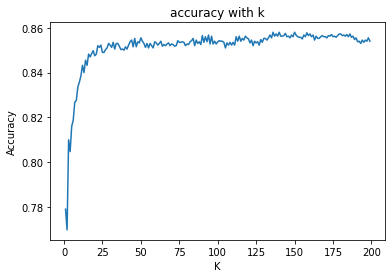

In [9]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
def learn():
    accuracy = []
    cross = KFold(5)
    for k in range(1, 200):
        # objectif c'est d'obtenir l'accuracy en fonction de k
        moy=cross_val_score(KNeighborsClassifier(n_neighbors=k),Xtrain,ytrain,cv=cross)
        #print(moy)
        resul=0
        for i in range (0,5):
            resul=resul + moy[i]
        resul=resul/5
        #print(resul)
        # contiendra toutes les valeurs de précision
        accuracy.append(resul)
    plt.figure()
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.title("accuracy with k")
    plt.plot(np.arange(1, 200, 1, dtype=int), accuracy)
    plt.show()
    # sera le max temp de accuracy
    max = 0
    # c'est l'indice qui représentera val max
    indice = -1
    for i in range(0, 199):
        if accuracy[i] > max:
            max = accuracy[i]
            indice = i
    # LE MEILLEUR K
    print("-------------------------------")
    print("best k = ")
    print(indice + 1)
    print("accuracy :")
    print(max)

learn()


To compare the complexity of the different algorithms we will use the scikit learn algorithms to have optimized results, because our version of bruteforce and Cercle aren't optiimized 

In [21]:
import time
print("------------------Bruteforce version---------------------")
brute=KNeighborsClassifier(n_neighbors=1, algorithm="brute")
#we start with bruteforce, 1st step we find the time for training time
tic = time.time()
brute.fit(X,ay)
print("training time : ")
toc=time.time()-tic
toc1=toc*1000
print(toc1)
tic=time.time()
#now we try to find time for test time
brute.predict(X)
toc=time.time()-tic
toc2=toc*1000
print("test time :")
print(toc2)
print("TOTAL TIME :")
print(toc2+toc1)

print("-----------------KD tree version----------------------")

#same thing than bruteforce
kd=KNeighborsClassifier(n_neighbors=1, algorithm="kd_tree")
tic = time.time()
kd.fit(X,ay)
toc=time.time()-tic
toc1=toc*1000
print("training time : ")
print(toc1)
tic=time.time()
#now we try to find time for test time
kd.predict(X)
toc=time.time()-tic
toc2=toc*1000
print("test time :")
print(toc2)
print("TOTAL TIME :")
print(toc2+toc1)





print("-----------------Cercle Version----------------------")
#same thing than bruteforce
cercle=KNeighborsClassifier(n_neighbors=1, algorithm="ball_tree")
tic = time.time()
cercle.fit(X,ay)
toc1=(time.time()-tic)*1000
print("training time : ")
print(toc1)
tic=time.time()
#now we try to find time for test time
cercle.predict(X)
toc=time.time()-tic
toc2=toc*1000
print("test time :")
print(toc2)
print("TOTAL TIME :")
print(toc2+toc1)

------------------Bruteforce version---------------------
training time : 
3.9124488830566406
test time :
242.21324920654297
TOTAL TIME :
246.1256980895996
-----------------KD tree version----------------------
training time : 
14.874696731567383
test time :
188.96961212158203
TOTAL TIME :
203.8443088531494
-----------------Cercle Version----------------------
training time : 
11.203527450561523
test time :
677.5374412536621
TOTAL TIME :
688.7409687042236


We can make an observation: the execution time for training a model is much lower for the bruteforce and much higher for the kd-tree. But during the test, it is the opposite which happens the brute force becomes the slowest, and the kd-tree is the fastest, one has thus this:

time for the training time : bruteforce < ball tree < kd tree

time for the test time : kd tree < ball tree < bruteforce

And for this data, the worst algorithm is Cercle version, it takes three times longer than the others.

For our version of Cercle and Bruteforce, we have the same result : Cercle Version take more times than bruteforce for this data

We will now make an imbalanced data, we will use the function make_imbalance 

Distribution before imbalancing: Counter({'2': 1358, '0': 1331, '1': 1311})
Distribution after imbalancing: Counter({2: 1358, 0: 150, 1: 60})
(1568, 2)


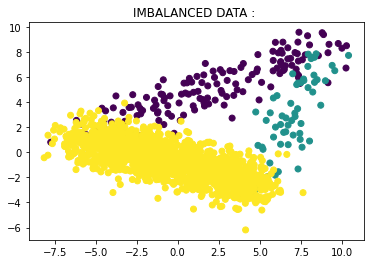

In [12]:
from collections import Counter
from imblearn.datasets import make_imbalance
ytrainint=ytrain.astype(int)
print(f'Distribution before imbalancing: {Counter(ytrain)}')
X_unbalanced, y_unbalanced = make_imbalance(Xtrain, ytrainint,
                              sampling_strategy={0: 150, 1: 60, 2: 1358},
                              random_state=42)
print(f'Distribution after imbalancing: {Counter(y_unbalanced)}')
#on tranforme en PCA la data pour avoir que deux params
pca=PCA(n_components=2)
x_pca=pca.fit_transform(X_unbalanced)#entraine model pca avec données, transforme ensuite x en x_pca
print(np.shape(x_pca))
plt.figure()
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_unbalanced)#les deux colonnes car pca les as réduits en deux colonnes
plt.title("IMBALANCED DATA : ")
plt.show()

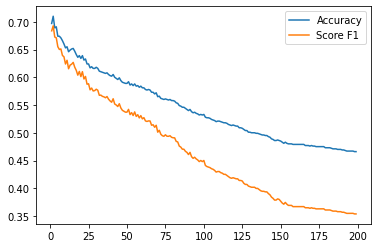

In [18]:
from sklearn.metrics import f1_score
f1 = []
accuracy = []
#
y_unbalanced=y_unbalanced.astype(str)
f1 = []
accuracy = []
#
for k in range(1,200):
    knn = KNeighborsClassifier(n_neighbors=k)
    #we train our classifier
    knn.fit(X_unbalanced, y_unbalanced)
    accuracytemp = knn.score(Xtest, ytest)
    predi=knn.predict(Xtest)
    f1temp = f1_score(ytest, predi,average="weighted")
    f1.append(f1temp)
    accuracy.append(accuracytemp)
plt.plot(np.arange(1, 200, 1, dtype=int), accuracy,label="Accuracy")
plt.plot(np.arange(1, 200, 1, dtype=int), f1, label="Score F1")
plt.legend()
plt.show()

As we can see, we loose a lot of accuracy (because number of data are diminued), but the most important thing it's the difference between the accuracy and the Score F1 when k is big. We can said something else : more you increase k, more Accuracy is bad and more you will have  a bigger difference with F1score and accuracy (F1score decrease faster than accuracy)

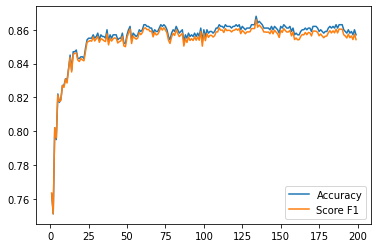

In [15]:
from sklearn.metrics import f1_score
f1 = []
accuracy = []
#
for k in range(1,200):
    knn = KNeighborsClassifier(n_neighbors=k)
    #we train our classifier
    knn.fit(Xtrain, ytrain)
    accuracytemp = knn.score(Xtest, ytest)
    predi=knn.predict(Xtest)
    f1temp = f1_score(ytest,predi,average='weighted')
    f1.append(f1temp)
    accuracy.append(accuracytemp)
plt.plot(np.arange(1, 200, 1, dtype=int), accuracy,label="Accuracy")
plt.plot(np.arange(1, 200, 1, dtype=int), f1, label="Score F1")
plt.legend()
plt.show()

With a data correctly balanced, the result is very different, the F1 score is almost equal to the accuracy.

We will now clean the data with CNN. Here's the 1st step :

Incomprehensibly it does not work on the notebook, it puts in the table - and not -1, this is really incomprehensible we can not fit our data because of this. We have given you the python code so that you can see what we have done and a screenshot of the result. I tried to change the -1's to 'n', but that creates another problem.

In [ ]:
coupe = 2500
S1 = X[0:coupe]
S2 = X[coupe:5000]
y1 = ay[0:coupe]
y2 = ay[coupe:5000]
ok1 = 0
ok2 = 0

# print(y1.size)
# print(S1.shape)

## ----------------------------------- ##

## First reduction

while (ok1 == 0 or ok2 == 0):

    if (ok1 == 0):
        brute = KNeighborsClassifier(n_neighbors=1, algorithm="brute")
        brute = brute.fit(S2, y2)
        newy1 = brute.predict(S1)
        ok1 = 1
        acc = 0
        for i in S1.index:
            if ((y1[acc] != newy1[acc])):
                y1[acc] = -1
                S1 = S1.drop(i)
                # print("S1 -> "+str(S1.shape))
                ok1 = 0
            acc += 1

        x = y1.size - 1
        while (x != -1):
            if (y1[x] == -1):
                y1 = np.delete(y1, x)
                newy1 = np.delete(newy1, x)
            x -= 1
        # print(y1.size)

    if (ok2 == 0):
        brute = KNeighborsClassifier(n_neighbors=1, algorithm="brute")
        brute = brute.fit(S1, y1)
        newy2 = brute.predict(S2)
        ok2 = 1
        acc = 0
        for i in S2.index:
            if ((y2[acc] != newy2[acc])):
                y2[acc] = -1
                S2 = S2.drop(i)
                # print("S2 -> "+str(S2.shape))
                ok2 = 0
            acc += 1

        x = y2.size - 1
        while (x != -1):
            if (y2[x] == -1):
                y2 = np.delete(y2, x)
                newy2 = np.delete(newy2, x)
            x -= 1
        # print(y2.size)

newdata = pd.concat([S1, S2])
newy = np.concatenate((y1, y2))
print(newdata)
print(newy)

plt.figure(figsize = (10,8))

pca=PCA(n_components=2)
x_pca=pca.fit_transform(newdata)#entraine model pca avec données, transforme ensuite x en x_pca
print(np.shape(x_pca))
plt.subplot(2,2,2)
plt.title("Data First step")
plt.scatter(x_pca[:,0],x_pca[:,1],c=newy)#les deux colonnes car pca les as réduits en deux colonnes


The second step

In [ ]:
import random 
## ----------------------------------- ##

## Second reduction

alea = random.randint(0,newy.size)
print(alea)
storage = pd.DataFrame()
storage = storage.append(newdata.iloc[alea])
ystorage = np.array([])
ystorage = np.append(ystorage,newy[alea])
#dustbin = pd.DataFrame()
print(storage)
print("ystorage -> "+str(ystorage))
print(storage.shape)
print(ystorage.size)
ok = 0

knn = KNeighborsClassifier(n_neighbors=1, algorithm="brute")
knn = knn.fit(storage,ystorage)

while (ok == 0):

    ok = 1 
    acc = 0
    for i in newdata.index :
        newystorage = knn.predict(newdata)
        if ( newy[acc] == newystorage[acc] ) :
            newdata = newdata.drop(i)
            newy = np.delete(newy,acc)
            acc -=1
        else :
            storage = storage.append(newdata.loc[i])
            ystorage = np.append(ystorage,newy[acc])
            knn = knn.fit(storage,ystorage)
            ok = 0

        acc += 1

print(storage)
print(ystorage)

We will now print the result with a PCA

In [ ]:
## ----------------------------------- ##

pca=PCA(n_components=2)
x_pca=pca.fit_transform(X)#entraine model pca avec données, transforme ensuite x en x_pca
print(np.shape(x_pca))
plt.subplot(2,2,1)
plt.title("Data before reduction")
plt.scatter(x_pca[:,0],x_pca[:,1],c=y)#les deux colonnes car pca les as réduits en deux colonnes

pca=PCA(n_components=2)
x_pca=pca.fit_transform(storage)#entraine model pca avec données, transforme ensuite x en x_pca
print(np.shape(x_pca))
plt.subplot(2,2,3)
plt.title("Data Second step")
plt.scatter(x_pca[:,0],x_pca[:,1],c=ystorage)#les deux colonnes car pca les as réduits en deux colonnes

plt.show()